In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

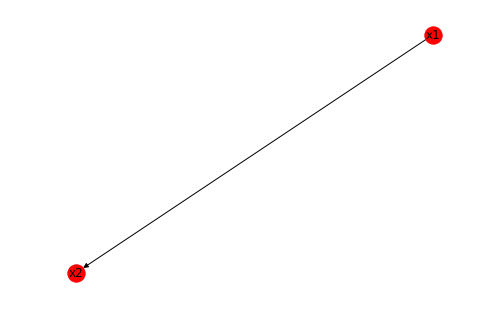


p(X2|X1) 
 [[0.4 0.6]
 [0.2 0.8]]

p(X1|x2)
 [[0.46153846 0.56756757]
 [0.23076923 0.75675676]]


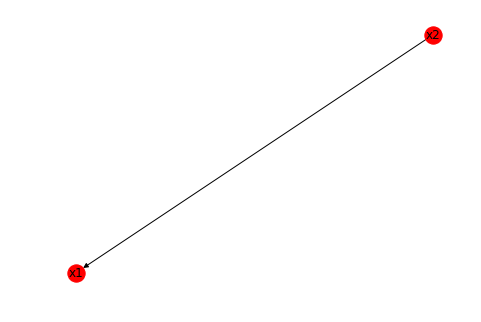

x2 [0.26 0.74]
x1 {('x2', '1'): array([0.23076923, 0.75675676]), ('x2', '0'): array([0.46153846, 0.56756757])}


In [15]:
## Simple example of a network with two binary vertices x1 and x2, connected by (x1,x2). We encode the 
## conditional probabilities of each node in an embedded dictionary and recalculate after reversing the edge.

## Probability table before reversal.
node_attr_list = [("x1",{
        "state_space":("0","1"),
        "parents":[],
        "dist":[.3,.7]}),
    ("x2",{ 
        "state_space":("0","1"),
        "parents":["x1"],
        "dist":{(("x1","1")):[.2,.8],
        (("x1","0")):[.4,.6]}})]
edge_list = [("x1","x2")]

G = nx.DiGraph()
G.clear()
G.add_edges_from(edge_list)
G.add_nodes_from(node_attr_list)
nx.draw(G, with_labels=True)
plt.show()

## Takes in a Bayesian network G and edge parameters (x1, x2), then returns a graph G_switched
## such that (x1, x2) is reversed to (x2, x1) and the joint probability function reflects the new
## representation of the Bayesian network
## Variable names are p=probability, g=given, e=equals: p(x=1|Y=0) --> pXe1gYe0

def switch_edge_probs(G,x1,x2):
    #Have p(x2|x1), p(x1). Want p(X1|x2), p(x2)
    
    #Collecting known values
    px1 = G.node["x1"]["dist"] #p(X1)
    px2gx1e0 = np.array(G.node["x2"]["dist"][('x1','0')]) #p(X2|X1=0)
    px2gx1e1 = np.array(G.node["x2"]["dist"][('x1','1')]) #p(X2|X1=1)
    px2gx1 = np.array([px2gx1e0, px2gx1e1]) #p(X2|X1)
    px1e0 = px1[0] #p(X1=0) = 0.3
    px1e1 = px1[1] #p(X1=1) = 0.7
    
    #Calculate p(x2) from p(x2|x1) and p(X1)
    px2 = (px2gx1e1 * px1e1) + (px2gx1e0 * px1e0) #p(X2) = [.26,.74]

    #Collecting 
    px2gx1 = np.array([px2gx1e0,px2gx1e1])
    print("\np(X2|X1) \n", px2gx1)
    px1gx2 = (px2gx1 * px1)/(px2)
    print("\np(X1|x2)\n", px1gx2)

    #Fine, need to be normalized if used. 
    px2x1 = px2 * px1gx2
    px1x2 = px1 * px2gx1

    new_node_attr_list = [("x2",{
        "state_space":("0","1"),
        "parents":[],
        "dist":
            px2}),
    ("x1",{
        "state_space":("0","1"),
        "parents":["x1"],
        "dist":
            {(("x2","1")):px1gx2[1],
            (("x2","0")):px1gx2[0]}})]
    new_edge_list = [("x2","x1")]
    
    G_switched = nx.DiGraph()
    G_switched.clear()
    G_switched.add_edges_from(new_edge_list)
    G_switched.add_nodes_from(new_node_attr_list)

    return(G_switched)

G_switched = switch_edge_probs(G,"x1","x2")
nx.draw(G_switched, with_labels=True)
plt.show()


#Print all vertex distributions
for k,v in G_switched.nodes(data=True):
    print(k,v['dist'])


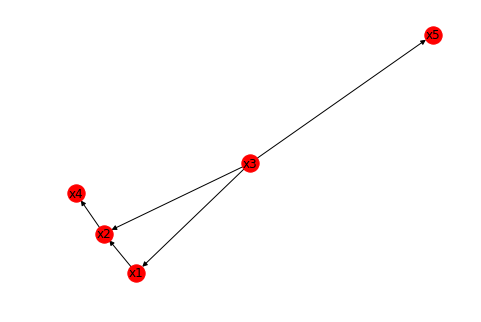


p(X2|X1) 
 [[0.4 0.6]
 [0.2 0.8]]

p(X1|x2)
 [[0.46153846 0.56756757]
 [0.23076923 0.75675676]]

 Need to recalculate x4
with distribution {('x2', '1'): [0.1, 0.9], ('x2', '0'): [0.5, 0.5]} 

key ('x2', '1')
value [0.1, 0.9]
key ('x2', '0')
value [0.5, 0.5]
[array([0.5, 0.5]), array([0.1, 0.9])]
P(recalculated node): [0.204 0.796]


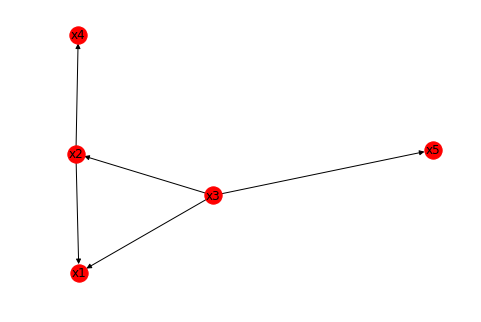

x3 [0.4, 0.6]
x5 [0.4, 0.6]
x1 {('x2', '1'): array([0.23076923, 0.75675676]), ('x2', '0'): array([0.46153846, 0.56756757])}
x2 [0.26 0.74]
x4 [0.204 0.796]


In [104]:
## Generalizing the above example to work for any covered edge reversal in a graph rather than a single
## edge graph. Once again using binary vertices x1,x2,...xn and WLOG switching the edge (x1,x2) to (x2,x1),
## then retrning the new conditional probabilities of each node in an embedded dictionary. 

## Maybe I can generate a random probability table for a given graph which adheres to its structure? Use pomegranate tools?

#Example graph such that (x1,x2) is covered and not the only edge.
edge_list = [("x1","x2"),("x3","x1"),("x3","x2"),("x2","x4"),("x3","x5")] 

#Probability table before reversal
node_attr_list = [
    ("x3",{
        "state_space":("0","1"),
        "dist":[.4,.6]}),
    ("x5",{
        "state_space":("0","1"),
        "dist":[.4,.6]}),
    ("x1",{
        "state_space":("0","1"),
        "dist":[.3,.7]}),
    ("x2",{
        "state_space":("0","1"),
        "dist":{(("x1","1")):[.2,.8],
        (("x1","0")):[.4,.6]}}),
    ("x4",{
        "state_space":("0","1"),
        "dist":{(("x2","1")):[.1,.9],
        (("x2","0")):[.5,.5]}})
    ]

#Set the graph.
G = nx.DiGraph()
G.clear()
G.add_edges_from(edge_list)
G.add_nodes_from(node_attr_list)
nx.draw(G, with_labels=True)
plt.show()

## Takes in a Bayesian network G and parameters of edge (x1, x2) to be switched, then returns a graph G_switched
## such that (x1, x2) is reversed to (x2, x1) and the joint probability function reflects the new
## representation of the Bayesian network.
## Variable names are p=probability, g=given, e=equals: p(x=1|Y=0) --> pXe1gYe0

def switch_edge_probs(G,x1,x2):
    
    #Establish graph to be returned, G_switched
    G_switched = nx.DiGraph()
    G_switched.clear()
    G_switched.add_nodes_from(node_attr_list)
    G_switched.add_edges_from(G.edges())
    G_switched.remove_edge("x1","x2")
    G_switched.add_edge("x2","x1")
    
    #Have p(x2|x1), p(x1). Want p(X1|x2), p(x2)
    
    #Collecting known values
    px1 = G.node["x1"]["dist"] #p(X1)
    px2gx1e0 = np.array(G.node["x2"]["dist"][('x1','0')]) #p(X2|X1=0)
    px2gx1e1 = np.array(G.node["x2"]["dist"][('x1','1')]) #p(X2|X1=1)
    px2gx1 = np.array([px2gx1e0, px2gx1e1]) #p(X2|X1)
    px1e0 = px1[0] #p(X1=0) = 0.3
    px1e1 = px1[1] #p(X1=1) = 0.7
    
    #Calculate p(x2) from p(x2|x1) and p(X1)
    px2 = (px2gx1e1 * px1e1) + (px2gx1e0 * px1e0) #p(X2) = [.26,.74]

    #Calculate p(X1|X2) from p(X1), p(X2), and p(X2|X1)
    px2gx1 = np.array([px2gx1e0,px2gx1e1])
    print("\np(X2|X1) \n", px2gx1)
    px1gx2 = (px2gx1 * px1)/(px2)
    print("\np(X1|x2)\n", px1gx2)

    #Sanity check; these should be the same value. Need to be normalized if used elsewhere. 
    px2x1 = px2 * px1gx2
    px1x2 = px1 * px2gx1

    #Format computed values
    px1gx2e0 = px1gx2[0]
    px1gx2e1 = px1gx2[1]
    
    #Give new attributes to reversed edge's vertices:
    new_attrs_x1 =  {
        (("x2","1")): px1gx2e1,
        (("x2","0")): px1gx2e0
        }
    new_attrs_x2 = px2
    G_switched.node["x1"]["dist"] = new_attrs_x1
    G_switched.node["x2"]["dist"] = new_attrs_x2
    
    #Create dictionary to store (X, p(X)) pairs for a node X.
    prob_dict = []
    
    #Determine which nodes (not includin x1 or x2) depend on x1 or x2
    nodes_to_recalculate = []
    for node in G_switched.nodes():
        #if node depends on x1 or x2 after switching
        if G.has_edge("x1",node) or G.has_edge("x2",node):
            if node != "x1" and node != "x2":
                nodes_to_recalculate.append(node)
    
#     #Add all nodes affected by edge switch
#     for node in nodes_to_recalculate:
#         for node in G.successors(node):
#             nodes_to_recalculate.append(node)
    
    #Recalculate nodes: 
    for node in nodes_to_recalculate:
        print("\n Need to recalculate", node)
        print("with distribution", G_switched.nodes[node]["dist"], "\n")
        
        for key in G_switched.nodes[node]["dist"].keys():
            print("key", key)
            print("value", G_switched.nodes[node]["dist"][key])
            
            parent = key[0]
            parentval = key[1]
            if parentval == "0":
                p_node_g_parent_e0 = np.array(G_switched.nodes[node]["dist"][key])
            if parentval == "1":
                p_node_g_parent_e1 = np.array(G_switched.nodes[node]["dist"][key])
            
            #Need to generalize, maybe via a "X: p(X)" dictionary for all altered nodes. 
            if parent == "x1":
                pparente0 = px1[0]
                pparente1 = px1[1]
            elif parent == "x2":
                pparente0 = px2[0]
                pparente1 = px2[1]
            
        p_node_g_parent = [p_node_g_parent_e0, p_node_g_parent_e1]
        print(p_node_g_parent)
        
        pnode = (p_node_g_parent_e0 * pparente0) + (p_node_g_parent_e1 * pparente1)
        print("P(recalculated node):", pnode)
        
        #Give new attributes to recalculated nodes:
        for key in G_switched.nodes[node]["dist"].keys():
            new_attrs_x2 = px2
            G_switched.node[node]["dist"] = pnode

    return(G_switched)

G_switched = switch_edge_probs(G,"x1","x2")
nx.draw(G_switched, with_labels=True)
plt.show()

#Print all vertex distributions
for k,v in G_switched.nodes(data=True):
    print(k,v['dist'])
